# Audio Analysis using Python
The default format of the audio file used in this jupyter file is wav.  
**This jupyter file contains useful functions and template for:**  
1) Playing audio file  
2) Extracting features from audio file  
3) Visualizing audio signals and features  
 
### Some packages used
1) pyaudio: Play audio file [Documentation](https://people.csail.mit.edu/hubert/pyaudio/docs/)  
2) wave: Load audio file [Documentation](https://docs.python.org/3/library/wave.html)  
3) librosa: Audio analysis library [Documentation](https://librosa.github.io/librosa/index.html)  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
import librosa.display
import librosa

# What to know about an audio file
Audio file can be found in three formats. Uncompressed (WAV), Lossless Compressed (FLAC), Lossy Compressed (MP3, MP4). An audio file is basically an array of amplitudes. Each element in the array is the **amplitude** at a certain point in time. Each element is also known as a **sample**. A **frame** consists of multiple samples depending on the number of audio signal channels.  

### What is a frame
For example, a frame of a mono audio file has only one example because it has only one channel.  
Representation of mono audio file: [45, 205, 210, 207, ...]  

A frame of a stereo audio file has two examples because it has two audio signal channels.  
Representation of stereo audio file: [(45, 44), (198, 207), (244, 200), (186, 204), ...]

When converting from stereo to mono. You just take the mean of the two channels.  
In this case, the first sample would be (45 + 44)/2 and the second sample would be (198 + 207)/2.  
Converted from stereo to mono: [44.5, 202.5, 222.0, 195.0, ...]  

### What is in a WAV file
We'll be using the WAV file for audio analysis. A WAV file can be separated into the header and the payload of bytes.  
The header contains information such as:  
1) **Frame Rate or Sample Rate**: The number of frames or samples in one second. The typical frame rate is 44,100 and 22,050 Hz.  
2) **Number of channels**: The number of audio signals that make up a frame.  
3) **Number of total frames or samples**: The total number of frames or samples that the audio file contains.  
4) **N_Frames * Frame_Rate** = Length of the audio file in seconds  

### The default settings of an audio file used in this jupyter file  
In this jupyter file, we will be using Librosa, which is a python library for audio analysis.  
It automatically converts stereo to mono and normalized the amplitudes into the range of [-1, 1] which gives us a floating point time series. We will also be using 44,100 Hz most of the time.  

In [2]:
# Stores an audio file for easy playback
class Audio():
    def __init__(self, filename):
        self.filename = filename
        self.chunk = 1024
        
        with wave.open(filename, 'rb') as wf:
            self.rate = wf.getframerate()
            self.total_sample_size = wf.getnframes()
    
    def time_series(self):
        return librosa.load(self.filename, sr=self.rate)[0]
    
#     Return the sample size for the given duration, return the maximum length of the sample size if duration exceed the sample's duration
    def get_sample_size(self, duration):
        return min(self.rate * duration, self.total_sample_size)
    
#     Play the audio file for the given duration, play the whole file if duration is not given
    def play(self, duration=-1):
        wf = wave.open(self.filename, 'rb')
        p = pyaudio.PyAudio()
        
        stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)
        
        if duration == -1:
            data = wf.readframes(self.chunk)
        else:
            d_chunk = duration * wf.getframerate()
            data = wf.readframes(d_chunk)
            stream.write(data)
            

            while len(data) > 0:
                stream.write(data)
                data = wf.readframes(self.chunk)
        
        stream.close()
        p.terminate()
        wf.close()

In [3]:
wayne_1 = Audio("./working_data/wayne_test_1.wav")
wayne_2 = Audio("./working_data/wayne_test_2.wav")
wayne_3 = Audio("./working_data/wayne_test_3.wav")
wayne_4 = Audio("./working_data/wayne_sing_1.wav")
wayne_5 = Audio("./working_data/wayne_sing_2.wav")
wayne_6 = Audio("./working_data/wayne_sing_3.wav")

In [4]:
def plot_magnitude_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]
    
    D = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
    t = np.arange(len(D))
    plt.title('Magnitude versus Frequency')
    plt.plot(t,D)
    plt.show()

In [5]:
def plot_phase_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]
    
    D = np.angle(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
    t = np.arange(len(D))
    plt.title('Phase versus Frequency')
    plt.plot(t,D)
    plt.show()

In [6]:
# x = floating point time series of audio files
# num_samples = number of samples to plot
def plot_db_scaled_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]

    D = librosa.amplitude_to_db(librosa.stft(x, n_fft=n_fft, hop_length=hop_length), ref=np.max)
    print(D.shape)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('DB spectogram')
    plt.show()

In [7]:
# y = floating point time series of audio files
# num_samples = number of samples to plot
def plot_wave(y, num_samples=5000):
    y = y[:num_samples]
    
    x = np.arange(num_samples)
    
    plt.plot(x,y)
    plt.show()

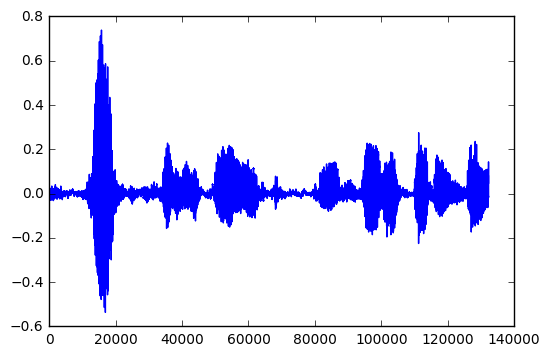

(1025, 259)


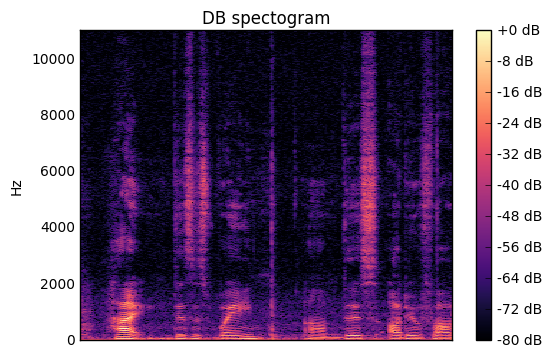

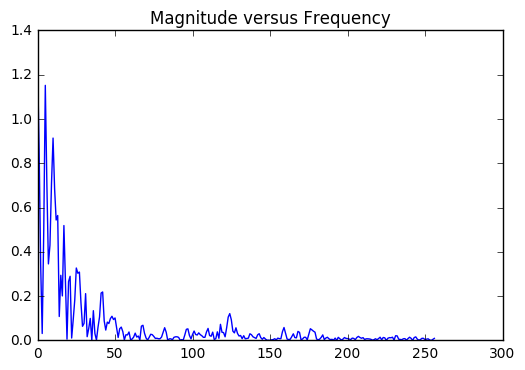

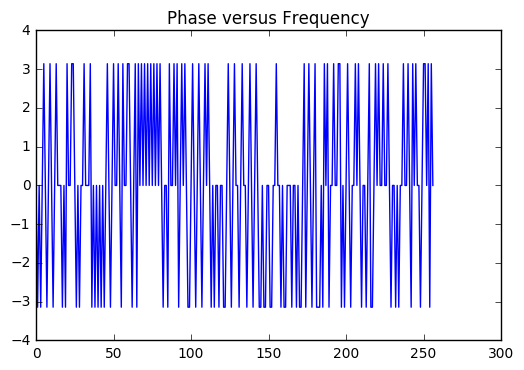

In [8]:
wayne_1_size = wayne_1.get_sample_size(3)
plot_wave(wayne_1.time_series(), wayne_1_size)
plot_db_scaled_spectogram(wayne_1.time_series(), wayne_1_size)
plot_magnitude_spectogram(wayne_1.time_series(), wayne_1_size, 512, wayne_1_size+1)
plot_phase_spectogram(wayne_1.time_series(), wayne_1_size, 512, wayne_1_size+1)

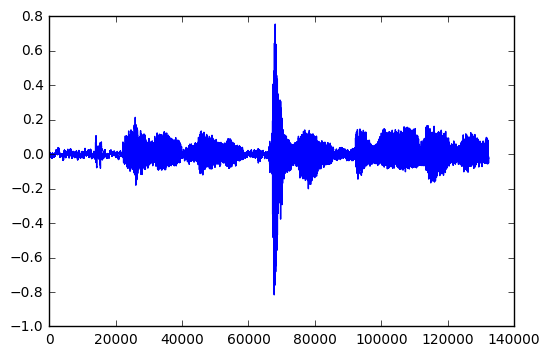

(1025, 259)


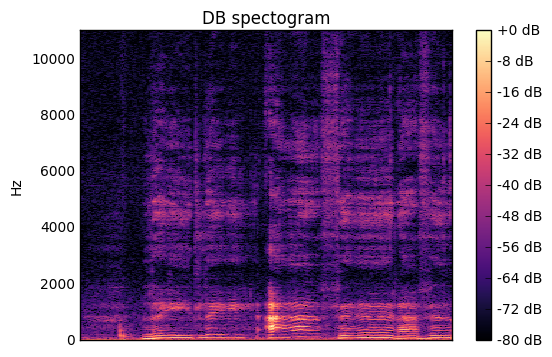

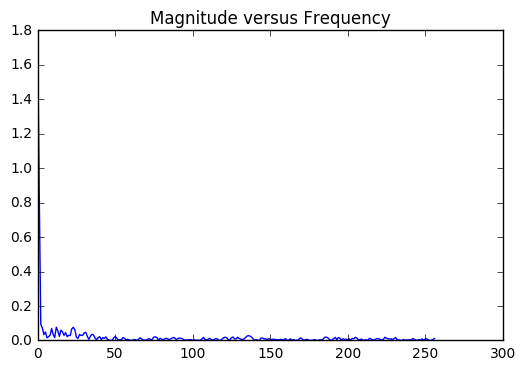

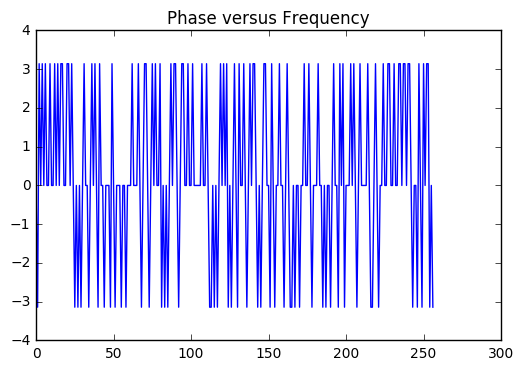

In [9]:
wayne_4_size = wayne_4.get_sample_size(3)
plot_wave(wayne_4.time_series(), wayne_4_size)
plot_db_scaled_spectogram(wayne_4.time_series(), wayne_4_size)
plot_magnitude_spectogram(wayne_4.time_series(), wayne_4_size, 512, wayne_4_size+1)
plot_phase_spectogram(wayne_4.time_series(), wayne_4_size, 512, wayne_4_size+1)

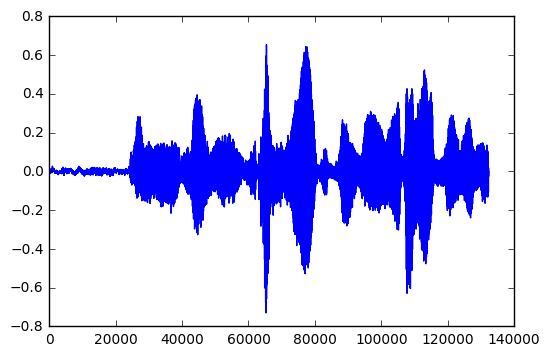

(1025, 259)


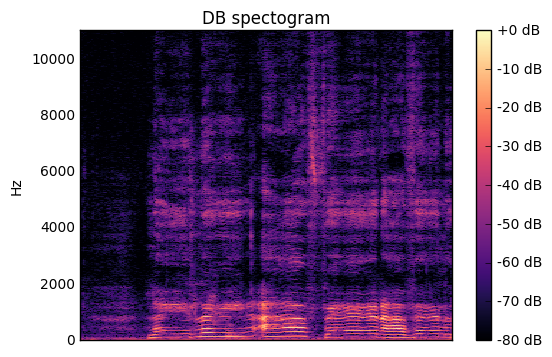

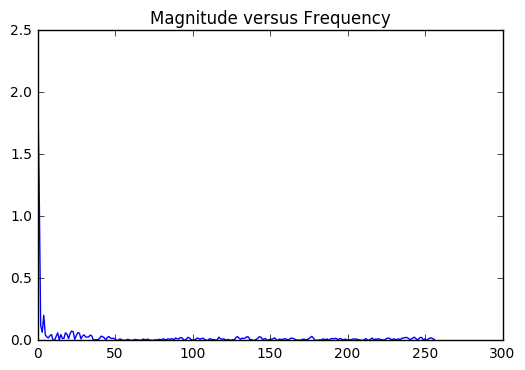

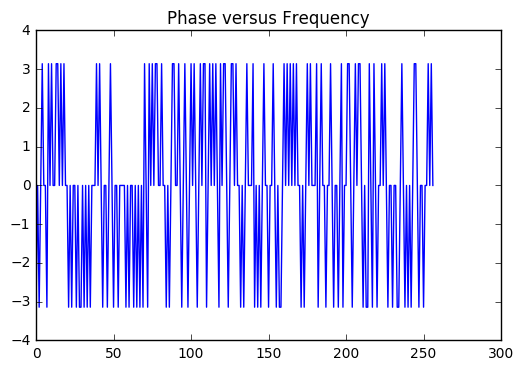

In [10]:
wayne_6_size = wayne_6.get_sample_size(3)
plot_wave(wayne_6.time_series(), wayne_6_size)
plot_db_scaled_spectogram(wayne_6.time_series(), wayne_6_size)
plot_magnitude_spectogram(wayne_6.time_series(), wayne_6_size, 512, wayne_6_size+1)
plot_phase_spectogram(wayne_6.time_series(), wayne_6_size, 512, wayne_6_size+1)

In [11]:
ex_1 = Audio("./working_data/abbott_10.wav")
ex_2 = Audio("./working_data/optic_10.wav")
ex_3 = Audio("./working_data/aeschylus_10.wav")

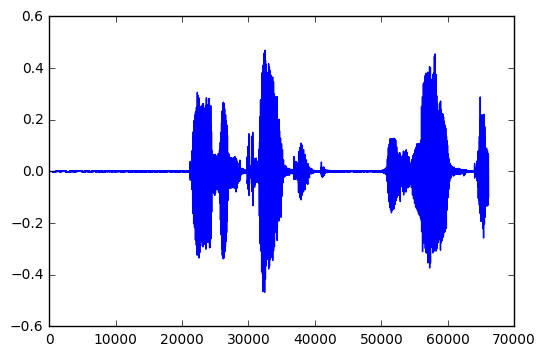

(1025, 130)


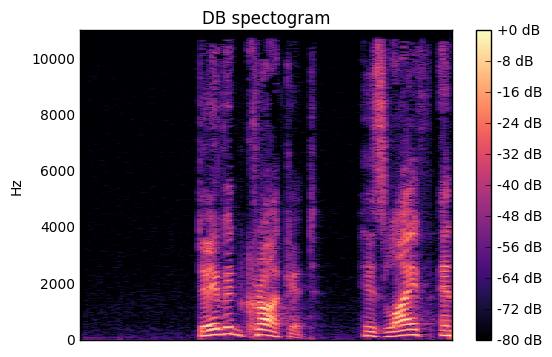

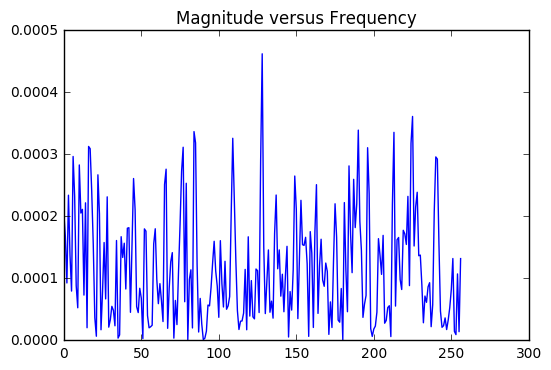

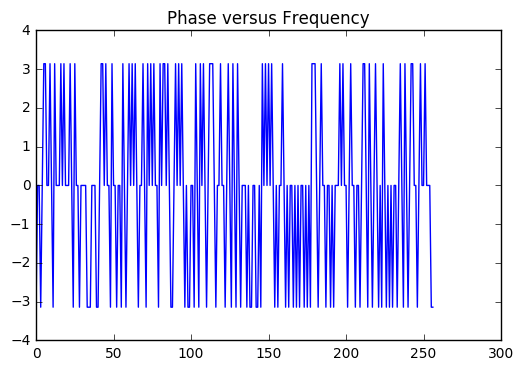

In [12]:
ex_1_size = ex_1.get_sample_size(3)
plot_wave(ex_1.time_series(), ex_1_size)
plot_db_scaled_spectogram(ex_1.time_series(), ex_1_size)
plot_magnitude_spectogram(ex_1.time_series(), ex_1_size, 512, ex_1_size+1)
plot_phase_spectogram(ex_1.time_series(), ex_1_size, 512, ex_1_size+1)

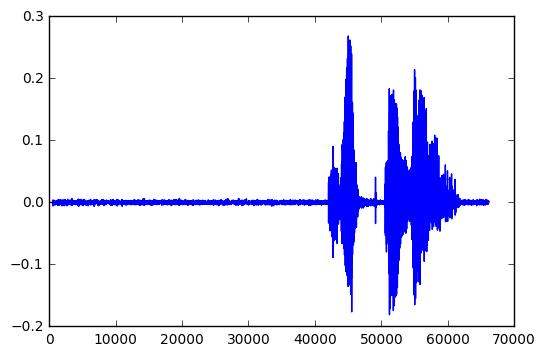

(1025, 130)


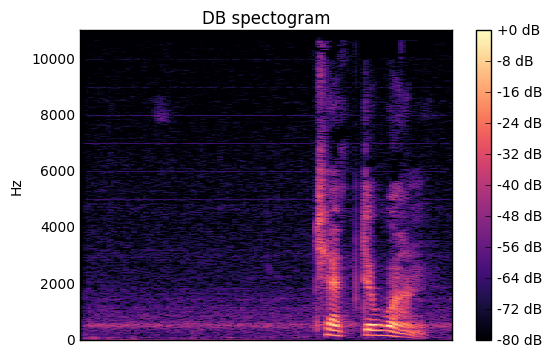

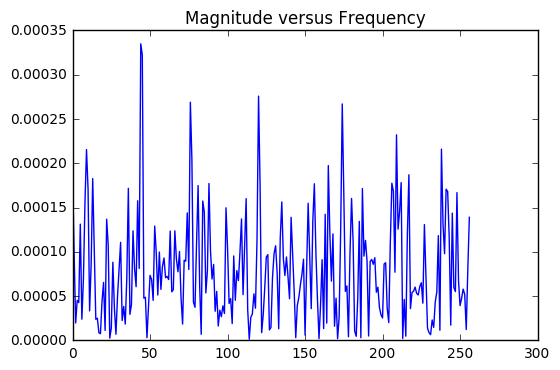

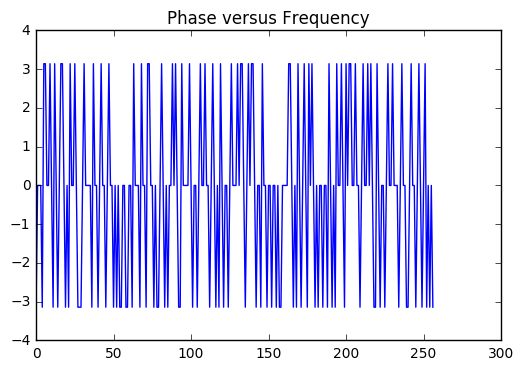

In [13]:
ex_2_size = ex_2.get_sample_size(3)
plot_wave(ex_2.time_series(), ex_2_size)
plot_db_scaled_spectogram(ex_2.time_series(), ex_2_size)
plot_magnitude_spectogram(ex_2.time_series(), ex_2_size, 512, ex_2_size+1)
plot_phase_spectogram(ex_2.time_series(), ex_2_size, 512, ex_2_size+1)

In [ ]:
ex_3_size = ex_3.get_sample_size(3)
# plot_wave(ex_3.time_series(), ex_3_size)
plot_db_scaled_spectogram(ex_3.time_series(), ex_3_size, 2048, 512)
# plot_magnitude_spectogram(ex_3.time_series(), ex_3_size, 512, ex_3_size+1)
# plot_phase_spectogram(ex_3.time_series(), ex_3_size, 512, ex_3_size+1)

(1025, 130)


### Classifying Audio

In [15]:
from sklearn import neighbors

In [16]:
def convert_audio_to_example(audio, label, n_fft=2048, hop_length=512):
    D = librosa.stft(audio.time_series(), n_fft=n_fft, hop_length=hop_length)
    D = np.transpose(D)
    
    D = np.insert(D, D.shape[1], label, 1)
    return D

In [17]:
E_1 = convert_audio_to_example(ex_1, 0, 2048, ex_1.rate)
E_2 = convert_audio_to_example(ex_2, 1, 2048, ex_2.rate)
E_3 = convert_audio_to_example(ex_3, 2, 2048, ex_3.rate)
E = np.concatenate([E_1, E_2, E_3])
np.random.shuffle(E)
train = E[:1400]
test = E[1400:]

In [18]:
features = np.abs(train[:,:-1])
labels = np.abs(train[:,-1])

knn = neighbors.KNeighborsClassifier()
knn.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
features_t = np.abs(test[:,:-1])
labels_t = np.abs(test[:,-1])

knn.score(features_t, labels_t)

0.84591194968553463